In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, decomposition
import torch.nn as nn
import torch.optim as optim
import math


In [2]:
train  = pd.read_csv('/content/drive/MyDrive/Kannada MNIST/train.csv') # train dataset
test = pd.read_csv('/content/drive/MyDrive/Kannada MNIST/test.csv') # test dataset

In [3]:
class Encoder(nn.Module):
    def __init__(self, n_in, n_hidden_1, n_hidden_2, n_hidden_3, n_out):
        super(Encoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(n_in, n_hidden_1, bias=True),
            nn.BatchNorm1d(n_hidden_1),
            nn.Sigmoid())
        self.layer2 = nn.Sequential(
            nn.Linear(n_hidden_1, n_hidden_2, bias=True),
            nn.BatchNorm1d(n_hidden_2),
            nn.Sigmoid())
        self.layer3 = nn.Sequential(
            nn.Linear(n_hidden_2, n_hidden_3, bias=True),
            nn.BatchNorm1d(n_hidden_3),
            nn.Sigmoid())
        n_size = math.floor(math.sqrt(n_out))
        self.layer4 = nn.Sequential(
            nn.Linear(n_hidden_3, n_out, bias=True),
            nn.BatchNorm1d(n_out),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.layer1(x.float())
        x = self.layer2(x)
        x = self.layer3(x)
        return self.layer4(x)

class Decoder(nn.Module):
    def __init__(self, n_in, n_hidden_1, n_hidden_2, n_hidden_3, n_out):
        super(Decoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(n_in, n_hidden_1, bias=True),
            nn.BatchNorm1d(n_hidden_1),
            nn.Sigmoid())
        self.layer2 = nn.Sequential(
            nn.Linear(n_hidden_1, n_hidden_2, bias=True),
            nn.BatchNorm1d(n_hidden_2),
            nn.Sigmoid())
        self.layer3 = nn.Sequential(
            nn.Linear(n_hidden_2, n_hidden_3, bias=True),
            nn.BatchNorm1d(n_hidden_3),
            nn.Sigmoid())
        n_size = math.floor(math.sqrt(n_out))
        self.layer4 = nn.Sequential(
            nn.Linear(n_hidden_3, n_out, bias=True),
            nn.BatchNorm1d(n_out),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.layer1(x.float())
        x = self.layer2(x)
        x = self.layer3(x)
        return self.layer4(x)

encoder = Encoder(784, 1000, 500, 250, 2)
decoder = Decoder(2, 250, 500, 1000, 784)

In [4]:
# Define the Mean Squared Error (MSE) loss function
loss_fn = nn.MSELoss()

# Define the optimizer for the decoder's parameters
optimizer = optim.Adam(
    decoder.parameters(),  # Pass the parameters of the decoder
    lr=0.001,               # Learning rate
    betas=(0.9, 0.999),     # Betas for Adam optimizer
    eps=1e-08               # Epsilon value for numerical stability
)

In [5]:
from torch.utils.data import DataLoader

In [6]:
from torch.utils.data import Dataset, random_split

In [7]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df.iloc[:, 0]
        self.data = df.iloc[:, 1:]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.tensor(self.data.iloc[idx,:])
        label = self.img_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image,label

In [8]:
train_images = CustomDataset(train)
test_images = CustomDataset(test)

In [9]:
from torch.utils.data import DataLoader

trainloader = DataLoader(train_images, batch_size=64, shuffle=True)
testloader = DataLoader(test_images, batch_size=64, shuffle=True)

## IMage

Feature batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])


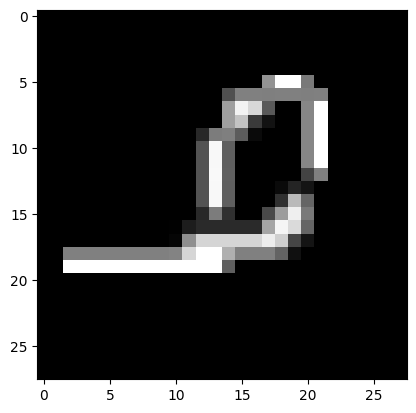

Label: 2033


In [42]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import utils
import random


test_features,test_labels = next(iter(testloader))
test_features[0].size()
for i in range(len(test_features)):
  torch.reshape(test_features[i],(28*28,1))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")
img = test_features[5].reshape(28,28).squeeze()
label = test_labels[5]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [10]:
# Training Loop
NUM_EPOCHS = 5
for epoch in range(NUM_EPOCHS):
    for input, labels in trainloader:
        optimizer.zero_grad()
        code = encoder(input)
        output = decoder(code)
        #print(input.shape, output.shape)
        loss = loss_fn(output, input)
        optimizer.step()
    print(f"Epoch: {epoch} Loss: {loss}")

Epoch: 0 Loss: 4438.322265625
Epoch: 1 Loss: 4523.615234375
Epoch: 2 Loss: 4234.49462890625
Epoch: 3 Loss: 4098.2333984375
Epoch: 4 Loss: 4115.48291015625
